## Medical Appointment no show prediction
### By : Lisa McFadden, Lidia Soto, Natalie Rodriguez

### Import libraries required for analysis and models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import time
import datetime as dt
from datetime import datetime


### Import data and look at your data content

In [2]:
data = pd.read_csv('No-show-Issue-Comma-300k.csv')
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


### DATA PROCESSING


### Renaming Columns
#### From looking at the data head we can see some of the columns are spelled incorrectly the code below will fix this 

In [3]:
data.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

In [4]:
print(data.columns)

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')


### Checking for Blanks

In [5]:
data.isnull().any()

Age                        False
Gender                     False
AppointmentRegistration    False
AppointmentData            False
DayOfTheWeek               False
Status                     False
Diabetes                   False
Alchoholism                False
Hypertension               False
Handicap                   False
Smokes                     False
Scholarship                False
Tuberculosis               False
Sms_Reminder               False
AwaitingTime               False
dtype: bool

### Converting the AppointmentRegistration and AppointmentData into a date and time format 

In [6]:
data['AppointmentRegistration'] = pd.to_datetime(data['AppointmentRegistration'])
data['AppointmentData'] = pd.to_datetime(data['AppointmentData'])

### Extract month from the appointments

In [7]:
data['AppointmentMonths'] = data['AppointmentData'].apply(lambda x : dt.datetime.strftime(x, '%B'))

In [8]:
data.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,AppointmentMonths
0,19,M,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29,January
1,24,F,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1,August
2,4,F,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1,February
3,5,M,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,August
4,38,M,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6,October


In [9]:
data.describe()

,Age,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,37.808017,0.077967,0.025010,0.215890,0.020523,0.052370,0.096897,0.000450,0.574173,-13.841813
std,22.809014,0.268120,0.156156,0.411439,0.155934,0.222772,0.295818,0.021208,0.499826,15.687697
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [10]:
data = data[(data['Age'] < 100) & (data['Age'] > 0)] ## drop all ages more than 100 and less than 0 
data.AwaitingTime = data.AwaitingTime.apply(abs)

In [11]:
data.describe()

,Age,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000,289631.000000
mean,39.148517,0.080748,0.025905,0.223536,0.021227,0.054241,0.099364,0.000459,0.575284,13.753272
std,22.035217,0.272448,0.158853,0.416615,0.158558,0.226494,0.299151,0.021424,0.499705,15.630098
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
max,99.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,398.000000


## Preliminary questions answered by data visualization
### 1.Who has hypertension?
#### Below we observe more females have a higher count of hypertension, but the data contains more entried for females than males.


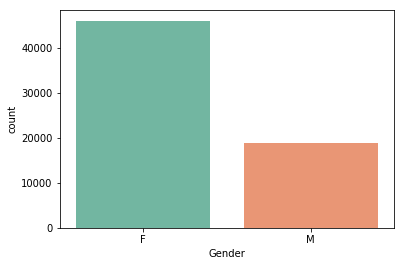

In [12]:

visits = data[data['Hypertension'] == 1]
sns.countplot(x='Gender', data=visits)

### 2. what is the proportion of male & female?
#### We can see there is a higer portion of women on the dataset

In [13]:

data['Gender'].value_counts(normalize = True)

F    0.674527
M    0.325473
Name: Gender, dtype: float64

### Visualize gender and hypertension distributions

(-1.106186393288021,
 1.1002945901565724,
 -1.1060981953800797,
 1.103556809187218)

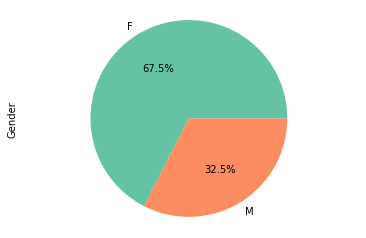

In [14]:

fig, pie = plt.subplots()
data['Gender'].value_counts(normalize = True).plot(kind='pie', autopct='%1.1f%%')
pie.axis('equal')

(-1.105387128486983,
 1.1002565531215596,
 -1.1048839022341808,
 1.1040425648925511)

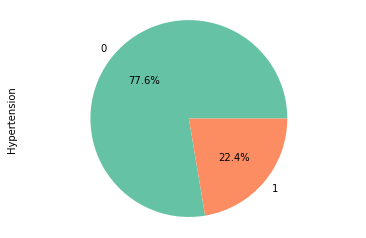

In [15]:

fig, pie = plt.subplots()
data['Hypertension'].value_counts(normalize = True).plot(kind='pie', autopct='%1.1f%%')
pie.axis('equal')

### 3. Does hypertension differ between the sexes?

#### Although females made up more of the patient population in the dataset, roughly similar proportions of males and females had hypertension.

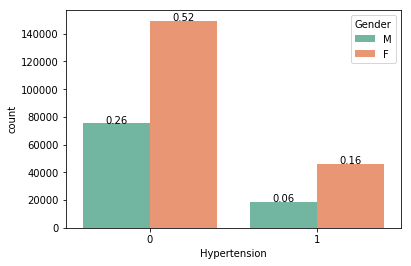

In [16]:
x = sns.countplot(x='Hypertension', hue='Gender', data=data)
# to plot the values over the labels
total = float(len(data))
for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha='center')

### 4. Does Dr. visits for hypertensive patients vary by month?
####  fewer appointments occurred over the North America winter months but the number of hypertensive visits were fairly stable from month-to-month.  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

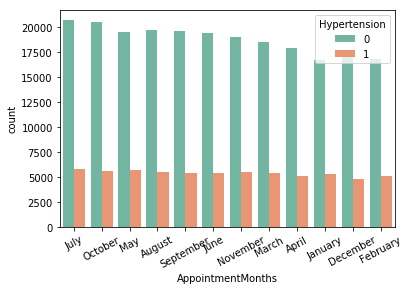

In [17]:
sns.countplot(x='AppointmentMonths', hue='Hypertension', data=data, order = data['AppointmentMonths'].value_counts().index)
plt.xticks(rotation=28)

### 5. In which day the patients visit their doctors most frequently?

#### The majority of appointments were during the week with the peak number of appointments occurring on Tuesday and Wednesday.  

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

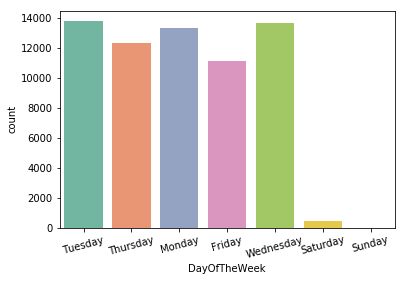

In [18]:

sns.countplot(x='DayOfTheWeek', data=visits)
plt.xticks(rotation=15)

### 6. is there specific weekday when most hypertensive patients visit?
 
#### The result show fewer visits on the weekend.

In [19]:
miss = data[data['Hypertension'] == 1]
miss.groupby('DayOfTheWeek')['Status'].count().sort_values(ascending=False)

DayOfTheWeek
Tuesday      13802
Wednesday    13667
Monday       13317
Thursday     12349
Friday       11130
Saturday       476
Sunday           2
Name: Status, dtype: int64

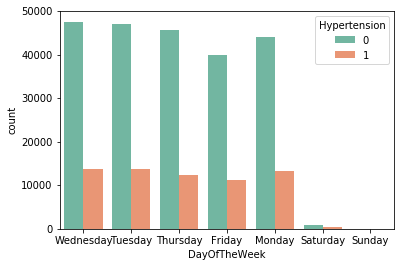

In [20]:
sns.countplot(x='DayOfTheWeek', hue='Hypertension', data=data)

###  7. Do men and women visit the doctor on the same days?
#### Taking into consideration there are more women samples it seems pretty even that men and women visit the doctor

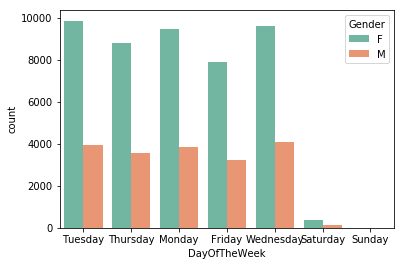

In [21]:
sns.countplot(x='DayOfTheWeek', hue='Gender', data=visits)

### 8. how likely are hypertensive patients to recieve an text reminder?
#### in the graph below it seems like SMS does not have much effect 

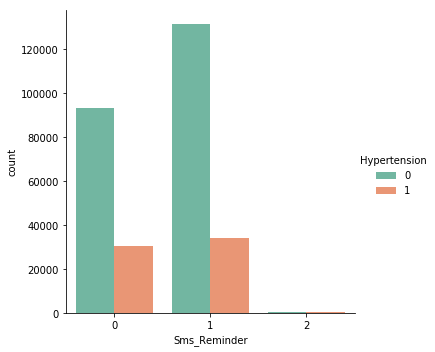

In [22]:

sns.catplot('Sms_Reminder', hue='Hypertension', data=data, kind='count')

### 8.Next the feature variables were visualized with the target variable of hypertension status

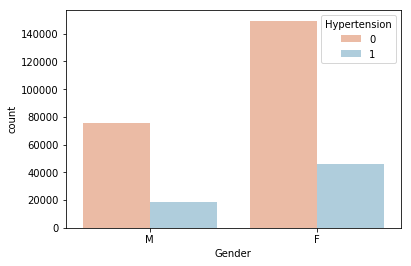

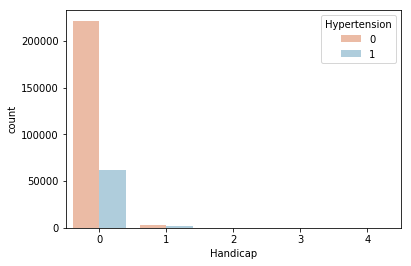

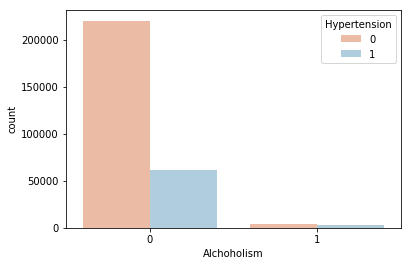

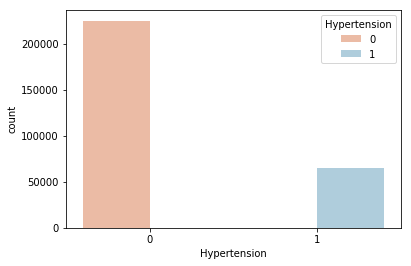

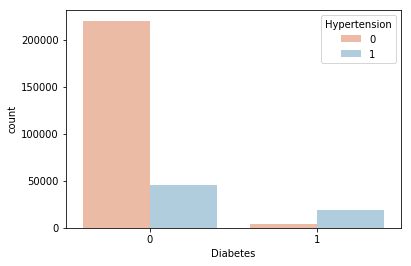

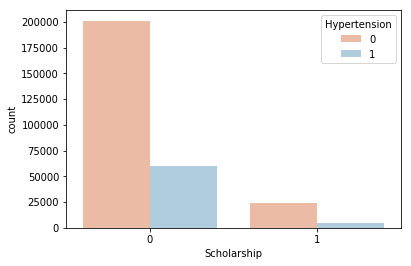

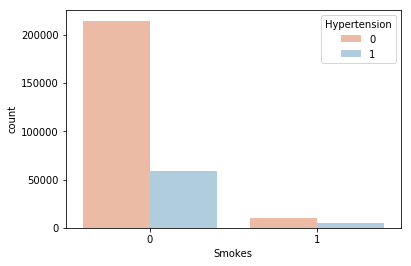

In [23]:
sns.countplot(x='Gender', hue='Hypertension', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Handicap', hue='Hypertension', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Alchoholism', hue='Hypertension', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Hypertension', hue='Hypertension', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Diabetes', hue='Hypertension', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Scholarship', hue='Hypertension', data=data, palette='RdBu')
plt.show();
sns.countplot(x='Smokes', hue='Hypertension', data=data, palette='RdBu')
plt.show();

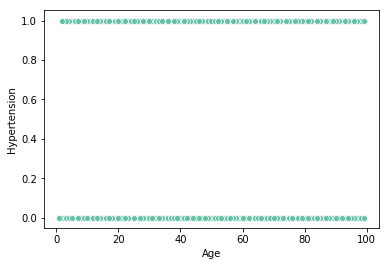

In [24]:
import seaborn as sns
sns.scatterplot(x="Age", y="Hypertension", data=data)


### Below We identify the total amount of patient in our data set to use on the function below
### Then we use a  function what will calculate all percentages of:     
* Scholarship
* Appointment Status
* Diabetes
* Alchoholism
* Smokes


In [25]:
total_of_patients=len(data)

In [26]:
def calculate_percentage(name,data):
  
    if name == 'Hypertension':
        yes, no = data[name].value_counts()
        print('percentage of patients no hypertension: {}%'.format(no/total_of_patients*100))
        print('percentage of patients with hypertension : {}%'.format(yes/total_of_patients*100))
    else:
        not_have, have = data[name].value_counts()
        print('percentage of patients not have {} : {}%'.format(name,not_have/total_of_patients*100))
        print('percentage of patients have {} : {}%'.format(name,have/total_of_patients*100))

In [27]:
columns=['Scholarship','Status','Diabetes','Alchoholism','Smokes']
for name in columns:
    calculate_percentage(name,data)

percentage of patients not have Scholarship : 90.06356363787026%
percentage of patients have Scholarship : 9.936436362129744%
percentage of patients not have Status : 69.69626870051894%
percentage of patients have Status : 30.30373129948106%
percentage of patients not have Diabetes : 91.92524280895347%
percentage of patients have Diabetes : 8.074757191046539%
percentage of patients not have Alchoholism : 97.40946238489664%
percentage of patients have Alchoholism : 2.5905376151033557%
percentage of patients not have Smokes : 94.57585686615037%
percentage of patients have Smokes : 5.424143133849622%


Text(0.5, 1.0, 'Correlation Matrix for Appointment Data')

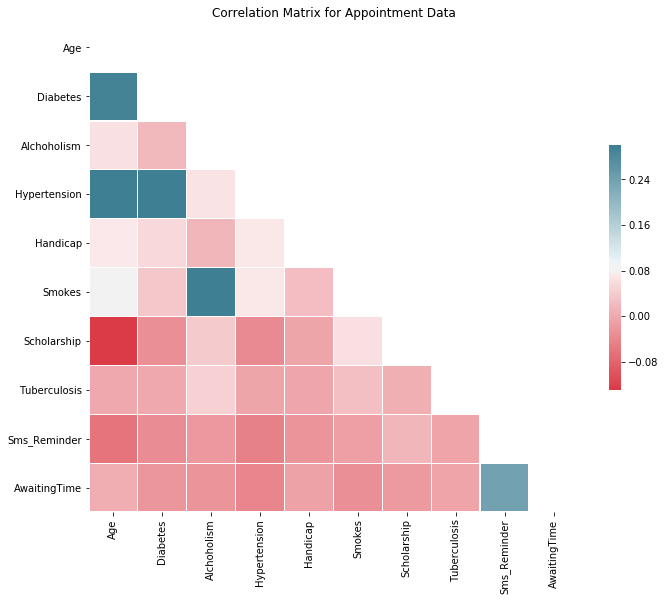

In [28]:
# View correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation Matrix for Appointment Data')


### Cleaning data into numeric form
### Convert  F =0, M=1
### Convert no-show status to numbers no-show =0 , show =1

In [29]:
data['Gender'] = data.Gender.apply(lambda x: 0 if(x=='F') else 1)
data['Status'] = data.Status.apply(lambda x: 0 if(x=='No-Show') else 1)
data['Handicap'] = data['Handicap'].apply(lambda x: 2 if x > 2 else x)

### Show a sample of the data after numeric enncoding is applied

In [30]:
data.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,AppointmentMonths
0,19,1,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,Wednesday,1,0,0,0,0,0,0,0,0,29,January
1,24,0,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,Wednesday,1,0,0,0,0,0,0,0,0,1,August
2,4,0,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,Tuesday,1,0,0,0,0,0,0,0,0,1,February
3,5,1,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,Thursday,1,0,0,0,0,0,0,0,1,15,August
4,38,1,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,Tuesday,1,0,0,0,0,0,0,0,1,6,October


In [31]:
#checked for missing data 
data.isnull().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
AppointmentData            0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alchoholism                0
Hypertension               0
Handicap                   0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
AppointmentMonths          0
dtype: int64

In [32]:
##Dummy code the Day and Month Variable

from sklearn.model_selection import cross_validate
y = data.Hypertension
X = data.drop(columns=['Hypertension', 'AppointmentRegistration', 'AppointmentData'], axis=1)
X=pd.get_dummies(X, columns=['DayOfTheWeek', 'AppointmentMonths'], prefix=['DayOfTheWeek', 'AppointmentMonths'])




In [33]:
##Removing multicollinearity

X = X.drop(columns=['DayOfTheWeek_Sunday', 'AppointmentMonths_January'], axis=1)

In [34]:
#checked for missing data 
X.isnull().sum()

Age                            0
Gender                         0
Status                         0
Diabetes                       0
Alchoholism                    0
Handicap                       0
Smokes                         0
Scholarship                    0
Tuberculosis                   0
Sms_Reminder                   0
AwaitingTime                   0
DayOfTheWeek_Friday            0
DayOfTheWeek_Monday            0
DayOfTheWeek_Saturday          0
DayOfTheWeek_Thursday          0
DayOfTheWeek_Tuesday           0
DayOfTheWeek_Wednesday         0
AppointmentMonths_April        0
AppointmentMonths_August       0
AppointmentMonths_December     0
AppointmentMonths_February     0
AppointmentMonths_July         0
AppointmentMonths_June         0
AppointmentMonths_March        0
AppointmentMonths_May          0
AppointmentMonths_November     0
AppointmentMonths_October      0
AppointmentMonths_September    0
dtype: int64

In [35]:
##Split into train, test, and validate

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,train_size=0.8, random_state=100)


#splitting data into 60% as train/20% as test/20% as validate
X_validate, X_train, y_validate, y_train  = train_test_split(X_trainval, y_trainval, train_size=0.25, random_state=100)

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
#Shape of train/test/Validate data
print(X_test.shape)
print(X_validate.shape)
print(X_train.shape)

(57927, 28)
(57926, 28)
(173778, 28)


In [37]:
##Scaler transformation of the x variables

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scale=scaler.fit_transform(X_train)
X_trainval_scale=scaler.fit_transform(X_trainval)
X_validate_scale=scaler.fit_transform(X_validate)
X_test_scale=scaler.fit_transform(X_test)

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were

In [38]:
###Checking Scaling

from scipy import stats
stats.describe(X_train_scale)


DescribeResult(nobs=173778, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])), mean=array([3.89240753e-01, 3.25248305e-01, 6.97861640e-01, 8.09941420e-02,
       2.57742637e-02, 1.03609203e-02, 5.48055565e-02, 9.93106147e-02,
       4.89129809e-04, 2.87720540e-01, 3.64611194e-02, 1.76552843e-01,
       1.97970974e-01, 4.68413723e-03, 1.99921739e-01, 2.10118657e-01,
       2.10740140e-01, 7.89282878e-02, 8.69615256e-02, 7.58496473e-02,
       7.50210038e-02, 9.11162518e-02, 8.49359528e-02, 8.29506612e-02,
       8.71571775e-02, 8.48093545e-02, 8.97179160e-02, 8.58163864e-02]), variance=array([0.05051426, 0.21946311, 0.21085198, 0.07443452, 0.0251101 ,
       0.0058874 , 0.05180221, 0.08944853, 0.00048889, 0.06245859,
       0.00198415, 0.14538277, 0.15877938, 0.00466222, 0.159

## Neural Networks

In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [73]:
##Changing to an array for Keras

x_trainval2 = np.array(X_trainval_scale).astype(float)
y_trainval2 = np.array(y_trainval)
x_test2 = np.array(X_test_scale).astype(float)
y_test2 = np.array(y_test)

In [74]:
# Very Deep Neural Network
model = Sequential()
model.add(Dense(800, activation='relu'))
model.add(Dense(720, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(640, activation='relu'))
model.add(Dense(560, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(480, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(320, activation='relu'))
model.add(Dense(240, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(160, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(96, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(1, activation='sigmoid'))

# Compile
epochs = 5
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(x_trainval2, y_trainval2, validation_split=0.25, epochs=epochs, batch_size=64, verbose=2)

W1207 17:21:10.972141 16476 deprecation_wrapper.py:119] From C:\Users\neefi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1207 17:21:11.042424 16476 deprecation_wrapper.py:119] From C:\Users\neefi\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1207 17:21:11.042424 16476 deprecation_wrapper.py:119] From C:\Users\neefi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1207 17:21:11.051993 16476 deprecation_wrapper.py:119] From C:\Users\neefi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1207 17:21:11.091941 16476 deprecation_wrapper.py:119] From C:\Users\neefi\Anac

Train on 173778 samples, validate on 57926 samples
Epoch 1/5
 - 80s - loss: 0.3886 - acc: 0.8172 - val_loss: 0.3452 - val_acc: 0.8334
Epoch 2/5
 - 77s - loss: 0.3500 - acc: 0.8310 - val_loss: 0.3428 - val_acc: 0.8330
Epoch 3/5
 - 76s - loss: 0.3474 - acc: 0.8326 - val_loss: 0.3425 - val_acc: 0.8337
Epoch 4/5
 - 78s - loss: 0.3469 - acc: 0.8325 - val_loss: 0.3424 - val_acc: 0.8339
Epoch 5/5
 - 78s - loss: 0.3459 - acc: 0.8334 - val_loss: 0.3422 - val_acc: 0.8339


Text(0.5, 0, 'epoch')

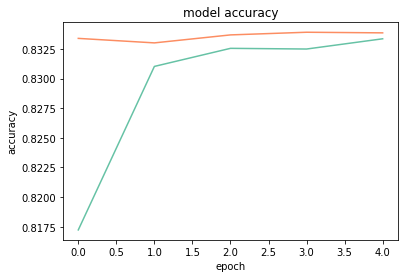

In [75]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

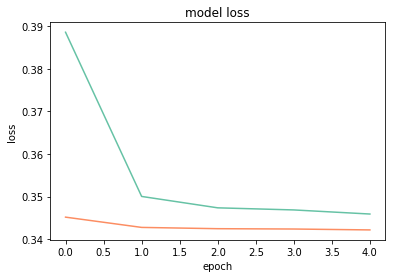

In [76]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [77]:
##NNET Test Prediction

accrsig = model.evaluate(x_test2,y_test2)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accrsig[0],accrsig[1]))

57927/57927 [==============================] - 7s 123us/step
Test set
  Loss: 0.344
  Accuracy: 0.831


In [98]:
# predict probabilities for test set
yhat_probs = model.predict(x_test2, verbose=0)
# predict classes for test set
yhat_classes = model.predict_classes(x_test2, verbose=0)

In [99]:
#from https://www.aiproblog.com/index.php/2019/03/28/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [103]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test2, yhat_classes))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90     44894
           1       0.69      0.45      0.55     13033

   micro avg       0.83      0.83      0.83     57927
   macro avg       0.77      0.70      0.72     57927
weighted avg       0.82      0.83      0.82     57927



## Decision Trees

In [39]:
##Decision Tree

from sklearn.tree import DecisionTreeClassifier

best_score=0

for max_depth in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train_scale, y_train)
    score=tree.score(X_validate_scale, y_validate)
    if score > best_score:
        best_score = score
        best_parameters= {'max_depth': max_depth}
            
tree= DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval_scale, y_trainval)
test_score=tree.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on validation set: 0.84
Best paramters:  {'max_depth': 8}
Test set score with best parameters: 0.83


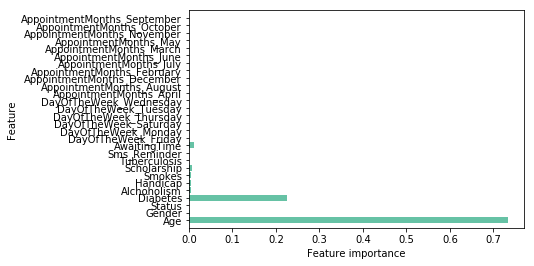

In [40]:
def plot_features_importances(model):
    n_features=X_train.shape[1]
    feature_names=list(X_train)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_features_importances(tree)

In [41]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_tree=tree.predict(X_test_scale)
print(confusion_matrix(y_test, pred_tree))

[[42047  2847]
 [ 6803  6230]]


In [42]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     44894
           1       0.69      0.48      0.56     13033

   micro avg       0.83      0.83      0.83     57927
   macro avg       0.77      0.71      0.73     57927
weighted avg       0.82      0.83      0.82     57927



## Random Forest

In [43]:
##Random Forest

from sklearn.ensemble import RandomForestClassifier

best_score=0

for max_depth in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for n_estimators in [10, 100, 1000, 10000]:
        forest=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        forest.fit(X_train_scale, y_train)
        score=forest.score(X_validate_scale, y_validate)
        if score > best_score:
            best_score = score
            best_parameters= {'max_depth': max_depth, 'n_estimators': n_estimators}
            
forest=RandomForestClassifier(**best_parameters)
forest.fit(X_trainval_scale, y_trainval)
test_score=forest.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.83
Best paramters:  {'max_depth': 10, 'n_estimators': 10}
Test set score with best parameters: 0.83


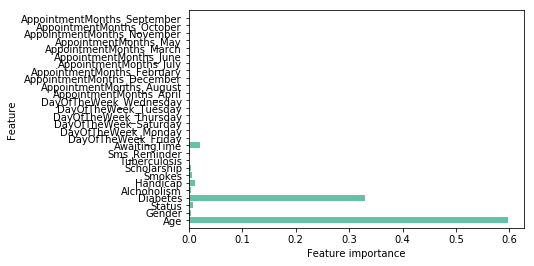

In [44]:
def plot_features_importances(model):
    n_features=X_train.shape[1]
    feature_names=list(X_train)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_features_importances(forest)

In [45]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_forest=forest.predict(X_test_scale)
print(confusion_matrix(y_test, pred_forest))

[[43831  1063]
 [ 8677  4356]]


In [46]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     44894
           1       0.80      0.33      0.47     13033

   micro avg       0.83      0.83      0.83     57927
   macro avg       0.82      0.66      0.69     57927
weighted avg       0.83      0.83      0.80     57927



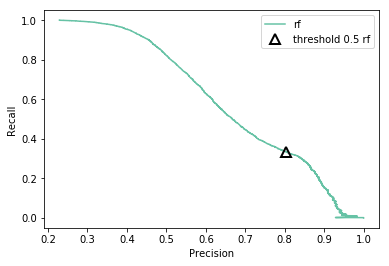

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, forest.predict_proba(X_test_scale)[:, 1])

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

## XGBOOST

In [39]:
#XGBOOST


import xgboost as xgb

best_score=0

for n_estimators in [100, 500, 1000]:
    for learning_rate in [0.001, 0.01, 0.05, 0.5]:
        for max_depth in [1, 3, 4, 5]:
            for subsample in [0.5, 0.75, 1]:
                for gamma in [0, 1, 5]:
                    for colsample_bytree in [0.1, 0.5, 1]:                 
                        XGB2=xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, gamma=gamma, colsample_bytree=colsample_bytree, subsample=subsample, random_state=1)
                        XGB2.fit(X_train_scale, y_train)
                        score=XGB2.score(X_validate_scale, y_validate)
                        if score > best_score:            
                            best_score = score            
                            best_parameters= {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth, 'gamma': gamma, 'colsample_bytree': colsample_bytree, 'subsample': subsample, 'random_state': 1 }

    
             
XGB2.fit(X_trainval_scale, y_trainval)
test_score=XGB2.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))



Best score on validation set: 0.84
Best paramters:  {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 1, 'subsample': 0.5, 'random_state': 1}
Test set score with best parameters: 0.84


In [49]:
XGB2.fit(X_trainval_scale, y_trainval)
test_score=XGB2.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))



Best score on validation set: 0.84
Best paramters:  {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 1, 'subsample': 0.5, 'random_state': 1}
Test set score with best parameters: 0.84


In [40]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_XGB2=XGB2.predict(X_test_scale)
print(confusion_matrix(y_test, pred_XGB2))

[[42280  2614]
 [ 6891  6142]]


In [41]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_XGB2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     44894
           1       0.70      0.47      0.56     13033

   micro avg       0.84      0.84      0.84     57927
   macro avg       0.78      0.71      0.73     57927
weighted avg       0.82      0.84      0.82     57927



## KNN

In [50]:
##KNN

from sklearn.neighbors import KNeighborsClassifier

best_score=0

for n_neighbors in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scale, y_train)
    score=knn.score(X_validate_scale, y_validate)
    if score > best_score:
            best_score = score
            best_parameters= {'n_neighbors': n_neighbors}
            
knn= KNeighborsClassifier(**best_parameters)
knn.fit(X_trainval_scale, y_trainval)
test_score=knn.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))
    

Best score on validation set: 0.82
Best paramters:  {'n_neighbors': 8}
Test set score with best parameters: 0.82


In [51]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_knn=knn.predict(X_test_scale)
print(confusion_matrix(y_test, pred_knn))

[[42302  2592]
 [ 7696  5337]]


In [52]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     44894
           1       0.67      0.41      0.51     13033

   micro avg       0.82      0.82      0.82     57927
   macro avg       0.76      0.68      0.70     57927
weighted avg       0.81      0.82      0.81     57927



## Logistic Regression

In [53]:
##logistic regression

from sklearn.linear_model import LogisticRegression

best_score=0

for C in[0.001, 0.01, 0.1, 1, 10, 100]:
    clf=LogisticRegression(C=C)
    clf.fit(X_train_scale, y_train)
    score=clf.score(X_validate_scale, y_validate)
    if score > best_score:
            best_score = score
            best_parameters= {'C': C}
            
clf= LogisticRegression(**best_parameters)
clf.fit(X_trainval_scale, y_trainval)
test_score=clf.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best score on validation set: 0.83
Best paramters:  {'C': 1}
Test set score with best parameters: 0.83


In [54]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_clf=clf.predict(X_test_scale)
print(confusion_matrix(y_test, pred_clf))

[[42031  2863]
 [ 6932  6101]]


In [55]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     44894
           1       0.68      0.47      0.55     13033

   micro avg       0.83      0.83      0.83     57927
   macro avg       0.77      0.70      0.73     57927
weighted avg       0.82      0.83      0.82     57927



## Bayes

In [56]:
##Naive Bayes

from sklearn.naive_bayes import GaussianNB


bay= GaussianNB()
bay.fit(X_train_scale, y_train)
best_score=bay.score(X_validate_scale, y_validate)

            
bay.fit(X_trainval_scale, y_trainval)
test_score=bay.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
#print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.81
Test set score with best parameters: 0.81


In [57]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_bay=bay.predict(X_test_scale)
print(confusion_matrix(y_test, pred_bay))

[[41666  3228]
 [ 7853  5180]]


In [58]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_bay))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     44894
           1       0.62      0.40      0.48     13033

   micro avg       0.81      0.81      0.81     57927
   macro avg       0.73      0.66      0.68     57927
weighted avg       0.79      0.81      0.79     57927



### Feature Selection
RFE


In [43]:
from sklearn.feature_selection import RFE


clf=LogisticRegression()
# create the RFE model and select 10 attributes
select = RFE(clf, 10)
select.fit(X_train_scale, y_train)
# summarize the selection of the attributes
print(RFE.support_)
print(RFE.ranking_)

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

NameError: name 'rfe' is not defined

([], <a list of 0 Text yticklabel objects>)

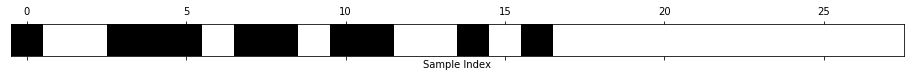

In [44]:
import matplotlib.pyplot as plt

mask=select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample Index")
plt.yticks(())

In [45]:
X_train_rfe=select.transform(X_train_scale)
X_test_rfe=select.transform(X_test_scale)
X_validate_rfe=select.transform(X_validate_scale)
X_trainval_rfe=select.transform(X_trainval_scale)


In [46]:
print("X_train_RFE Shape: {}".format(X_train_rfe.shape))

X_train_RFE Shape: (173778, 10)


In [47]:
##logistic regression RFE

from sklearn.linear_model import LogisticRegression

best_score=0

for C in[0.001, 0.01, 0.1, 1, 10, 100]:
    clf=LogisticRegression(C=C)
    clf.fit(X_train_rfe, y_train)
    score=clf.score(X_validate_rfe, y_validate)
    if score > best_score:
            best_score = score
            best_parameters= {'C': C}
            
clf= LogisticRegression(**best_parameters)
clf.fit(X_trainval_rfe, y_trainval)
test_score=clf.score(X_test_rfe, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neefi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best score on validation set: 0.83
Best paramters:  {'C': 1}
Test set score with best parameters: 0.83


In [48]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_clf=clf.predict(X_test_rfe)
print(confusion_matrix(y_test, pred_clf))

[[42019  2875]
 [ 6938  6095]]


In [49]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     44894
           1       0.68      0.47      0.55     13033

   micro avg       0.83      0.83      0.83     57927
   macro avg       0.77      0.70      0.72     57927
weighted avg       0.82      0.83      0.82     57927



In [50]:
#XGBOOST

import xgboost as xgb

best_score=0

for n_estimators in [100, 500, 1000]:
    for learning_rate in [0.001, 0.01, 0.05, 0.5]:
        for max_depth in [1, 3, 4, 5]:
            for subsample in [0.5, 0.75, 1]:
                for gamma in [0, 1, 5]:
                    for colsample_bytree in [0.1, 0.5, 1,]:                 
                        XGB2=xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, gamma=gamma, colsample_bytree=colsample_bytree, subsample=subsample, random_state=1)
                        XGB2.fit(X_train_rfe, y_train)
                        score=XGB2.score(X_validate_rfe, y_validate)
                        if score > best_score:            
                            best_score = score            
                            best_parameters= {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth, 'gamma': gamma, 'colsample_bytree': colsample_bytree, 'subsample': subsample, 'random_state': 1 }

    
             
XGB2.fit(X_trainval_rfe, y_trainval)
test_score=XGB2.score(X_test_rfe, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.84
Best paramters:  {'n_estimators': 1000, 'learning_rate': 0.05, 'max_depth': 5, 'gamma': 0, 'colsample_bytree': 1, 'subsample': 1, 'random_state': 1}
Test set score with best parameters: 0.83


In [51]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_XGB2=XGB2.predict(X_test_rfe)
print(confusion_matrix(y_test, pred_XGB2))

[[41906  2988]
 [ 6642  6391]]


In [52]:
##Classification Report

from sklearn.metrics import classification_report


print(classification_report(y_test, pred_XGB2))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     44894
           1       0.68      0.49      0.57     13033

   micro avg       0.83      0.83      0.83     57927
   macro avg       0.77      0.71      0.73     57927
weighted avg       0.82      0.83      0.82     57927



### Feature Selection
L1 reg

In [67]:
##logistic l1 reg

from sklearn.feature_selection import SelectFromModel


from sklearn.linear_model import LogisticRegression

best_score=0

for C in[0.001, 0.01, 0.1, 1, 10, 100]:
    clf_l1=LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l1.fit(X_train_scale, y_train)
    score=clf_l1.score(X_validate_scale, y_validate)
    if score > best_score:
            best_score = score
            best_parameters= {'C': C}
            
clf_l1= LogisticRegression(**best_parameters, penalty='l1', tol=0.01, solver='saga')
clf_l1.fit(X_trainval_scale, y_trainval)
test_score=clf_l1.score(X_test_scale, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best paramters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))



Best score on validation set: 0.83
Best paramters:  {'C': 10}
Test set score with best parameters: 0.83


In [68]:
result=clf_l1.fit(X_trainval_scale, y_trainval)
print(result.coef_)

[[ 7.04401661e+00 -2.12798568e-01 -9.68155221e-03  2.28281934e+00
   5.87967298e-01  8.72059787e-01  3.60119414e-01  4.72599865e-01
  -1.31423788e+00  5.65707979e-02 -3.16117918e+00 -1.16210231e+00
  -1.15769134e+00 -7.78624087e-01 -1.15142832e+00 -1.16274249e+00
  -1.17055807e+00 -3.40170001e-02 -3.99999613e-02 -6.14959978e-02
   5.11311414e-02 -5.25095878e-03 -3.62526768e-02 -3.94889620e-02
   2.03775380e-02 -1.50215411e-02 -8.96361874e-02 -3.56722946e-02]]


In [69]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

pred_clf=clf_l1.predict(X_test_scale)
print(confusion_matrix(y_test, pred_clf))

[[42124  2770]
 [ 7009  6024]]
